Sea $X$ una variable aleatoria con distribución normal y $h(t)=I_{[3,\infty)}(t)$ la función característica del intervalo $[3,\infty)$. Entonces, si se considera una secuencia $X_i\sim N(0,1)$ de variables aleatorias independientes, se tiene que $h(X_1), h(X_2), \ldots$ son variables aleatorias independientes e idénticamente distribuidas, con media igual a $E[g(X)]$, por la Ley Fuerte de los Grandes Números, se tiene que:
$$E[h(X)]\simeq \lim_{n\rightarrow\infty}\frac{1}{n}\sum_{i=1}^{n}h(X_i)$$

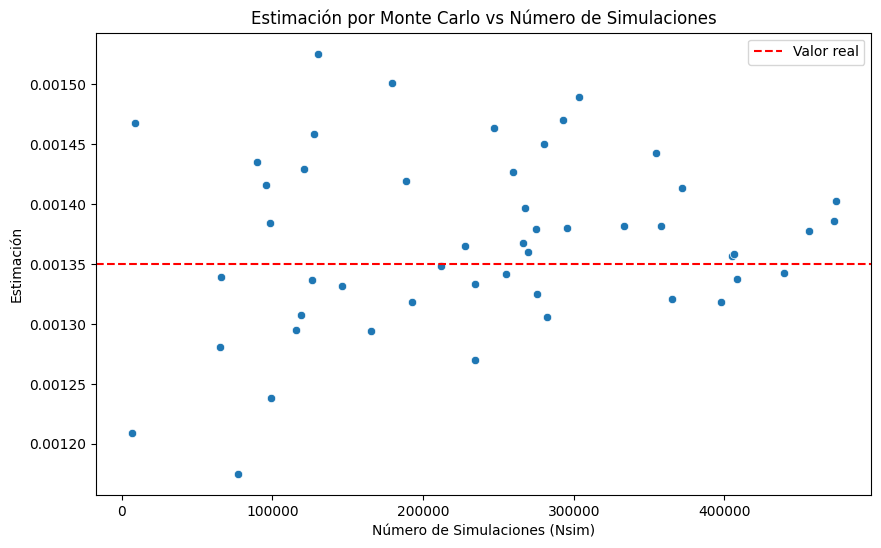

In [ ]:
from numpy.random import normal
import matplotlib.pyplot as plt
from random import random
import seaborn as sns
import pandas as pd

def estimacion1a(n):
    estimacion = 0
    for _ in range(n):
        X = normal(0, 1)
        estimacion += 1 if X > 3 else 0
    return round(estimacion/n, 7)

# Crear listas para guardar los valores de Nsim y la estimación
nsim = []
estimacion = []

# Calcular la estimación para 50 valores de Nsim
for _ in range(50):
    U = int(random() * 500000) + 1
    nsim.append(U)
    estimacion.append(estimacion1a(U))

# Ordenar las listas
desordenado = list(zip(nsim, estimacion))
ordenado = sorted(desordenado)
nsim, estimacion = zip(*ordenado)
nsim = list(nsim)
estimacion = list(estimacion)

# Crear un DataFrame con los valores de Nsim y la estimación
d = {'Nsim': nsim, 'Estimacion': estimacion}
df = pd.DataFrame(data=d)

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Nsim', y='Estimacion', data=df)

# Agregar una línea recta horizontal en el valor real (y=0.0013499)
plt.axhline(y=0.0013499, color='r', linestyle='--', label='Valor real')

# Agregar títulos y etiquetas
plt.title('Estimación por Monte Carlo vs Número de Simulaciones')
plt.xlabel('Número de Simulaciones (Nsim)')
plt.ylabel('Estimación')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()